# Análisis de datos a encuesta anónima a potenciales participantes de un emprendmiento de compra grupal de vinos

In [3]:
#Importamos las librerías a utilizar
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Ocultamos los mensajes de advertencia 
import warnings
warnings.filterwarnings('ignore')
# Ajustamos algunos parámetros en Pandas
pd.options.display.max_rows = 99 # Establece el l-imite de filas a mostrar de un DataFrame.
# Este código ajusta la visualización de números con decimales, separando los miles y dejando solo 2 decimales
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [4]:
# Lee el archivo Excel
df = pd.read_excel('vinos.xlsx')
df.head()

,tiempo,rango_etario,genero,zona,barrio_caba,municipio1,municipio2,municipio3,gustos,preferido,vinos_semana,proveedor,precio,prov_residencia,ciudad_residencia
0,2023-09-06 00:48:14.049,26 a 35,Masculino,GBA Norte,NaN,San Isidro,NaN,NaN,"Tinto con cuerpo, Tinto ligero, Rosado",Tinto ligero,2,Chino,6000,NaN,NaN
1,2023-09-06 08:40:37.065,26 a 35,Masculino,GBA Norte,NaN,San Isidro,NaN,NaN,"Tinto con cuerpo, Tinto ligero",Tinto con cuerpo,1,Chino,2500,NaN,NaN
2,2023-09-06 18:23:55.271,26 a 35,Masculino,GBA Norte,NaN,San Isidro,NaN,NaN,Tinto ligero,Tinto ligero,2,Chino,4000,NaN,NaN
3,2023-09-07 03:39:33.285,26 a 35,Femenino,GBA Norte,NaN,San Isidro,NaN,NaN,"Tinto ligero, Blanco ligero",Blanco ligero,1,Supermercado,7000,NaN,NaN
4,2023-09-12 19:55:52.674,66 o +,Masculino,GBA Norte,NaN,San Isidro,NaN,NaN,"Tinto con cuerpo, Blanco con cuerpo, Rosado",Rosado,3,Vinoteca online,5000/6000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tiempo             380 non-null    datetime64[ns]
 1   rango_etario       380 non-null    object        
 2   genero             379 non-null    object        
 3   zona               380 non-null    object        
 4   barrio_caba        236 non-null    object        
 5   municipio1         82 non-null     object        
 6   municipio2         21 non-null     object        
 7   municipio3         25 non-null     object        
 8   gustos             380 non-null    object        
 9   preferido          380 non-null    object        
 10  vinos_semana       380 non-null    object        
 11  proveedor          380 non-null    object        
 12  precio             380 non-null    object        
 13  prov_residencia    16 non-null     object        
 14  ciudad_res


# Limpieza de datos e imputación d valores faltantes
### Paso 1: Municipio y Barrio

- Consolidamos los valores de municipio en una unica columna y borramos las anteriores
- Los barrios que tienen valores nulos, completo con el municipio
- Renombra la columna 'barrio_caba' a 'barrio'
- Elimina la columna 'municipio'pio'io'

In [6]:
#consolidamos los valores de municipio en una unica columna
df['municipio'] = df['municipio1'].fillna(df['municipio2']).fillna(df['municipio3'])

# Elimina las columnas anteriores si es necesario
df.drop(['municipio1', 'municipio2', 'municipio3'], axis=1, inplace=True)

#Los barrios que tienen valores nulos, completo con el municipio
df['barrio_caba'].fillna(df['municipio'], inplace=True)

# Renombra la columna 'barrio_caba' a 'barrio'
df.rename(columns={'barrio_caba': 'barrio'}, inplace=True)

# Elimina la columna 'municipio'
df.drop('municipio', axis=1, inplace=True)

### Paso 2: El precio
- Convierte la columna 'precio' a numérica, los valores no numéricos se establecerán como nulos
- Identifica las filas donde 'precio' no es numérico
- Muestra las filas donde 'precio' no es numéri para plantear una estrategia adecuada de imputaciónco


In [7]:
# Convierte la columna 'precio' a numérica, los valores no numéricos se establecerán como NaN
df['precio_numerico'] = pd.to_numeric(df['precio'], errors='coerce')

# Identifica las filas donde 'precio' no es numérico
filas_no_numericas = df[df['precio_numerico'].isna()]

# Muestra las filas donde 'precio' no es numérico
print ("De ", len(df) , " presentan problemas con el precio de referencia : ", len(filas_no_numericas))

De  380  presentan problemas con el precio de referencia :  46


### Imputación del promedio al precio:
Más del 10% de los valores no respondieron un valor numérico al preguntarle el precio que gastaría por un vino. Podría optar por eliminar estos registros pero como los resultados son pocos (< 500) prefiero abordar el problema imputando el valor promedio del precio a todos estos casos. De esta forma, no pierdo los valores en los campos restantes y no altero estadísticamente el conjunto de datos en ese valor. Para esto:
- Calculo el promedio de los valores numéricos en 'precio'
-  Relleoa los valoresnulosN en 'precio_numerico' con el promedi
- Convierto el precio en enteroo


In [8]:
# Calcula el promedio de los valores numéricos en 'precio'
precio_promedio = df['precio_numerico'].mean()

# Rellena los valores NaN en 'precio_numerico' con el promedio
df['precio_numerico'].fillna(precio_promedio, inplace=True)

# convierto el precio en entero
df['precio_numerico']=df['precio_numerico'].astype(int)

### 3. La cantidad
Se realiza un trabajo similar al realizado con el precio, pero con la cantidad

In [9]:
# Convierte la columna 'cantidad' a numérica, los valores no numéricos se establecerán como NaN
df['cantidad_numerico'] = pd.to_numeric(df['vinos_semana'], errors='coerce')

# Identifica las filas donde 'cantidad' no es numérico
filas_no_numericas = df[df['cantidad_numerico'].isna()]

# Muestra las filas donde 'cantidad' no es numérico
print ("De ", len(df) , " presentan problemas con la cantidad : ", len(filas_no_numericas))

De  380  presentan problemas con la cantidad :  76


In [10]:
# Calcula el promedio de los valores numéricos en 'precio'
cantidad_promedio = df['cantidad_numerico'].mean()

# Rellena los valores NaN en 'precio_numerico' con el promedio
df['cantidad_numerico'].fillna(cantidad_promedio, inplace=True)

### 4. New features
Con los datos que tenemos, vamos a crear nuevas variables.
1) El gasto mensual, que surje de multiplicar el precio x la cantidad semanal x 4

In [11]:
# Calcular el gasto por mes
df['gasto_mensual'] = df['precio_numerico'] * df['cantidad_numerico'] * 4

In [12]:
df.describe()

,tiempo,precio_numerico,cantidad_numerico,gasto_mensual
count,380,380.00,380.00,380.00
mean,2024-01-22 12:35:13.142197248,"7,408.54",1.74,"52,097.98"
min,2023-09-06 00:48:14.049000,0.00,1.00,0.00
25%,2024-02-06 21:14:44.531000064,"4,500.00",1.00,"27,894.74"
50%,2024-02-07 02:47:47.196499968,"7,000.00",1.74,"40,000.00"
75%,2024-02-07 13:33:56.667749888,"8,000.00",2.00,"64,000.00"
max,2024-02-16 23:09:02.877000,"50,000.00",3.00,"400,000.00"
std,NaN,"5,430.17",0.65,"45,495.93"


### 5. Rango válido de precio
En base a la dispersión visualizada, procedemos a establecer un rango válido entre 3000 y 20000 pesos para una botella de vino (Feb. 2024)

In [13]:
# Definir el rango específico
rango_min = 3000
rango_max = 20000

# Calcular el promedio de los precios dentro del rango
promedio_rango = df.loc[(df['precio_numerico'] >= rango_min) & (df['precio_numerico'] <= rango_max), 'precio_numerico'].mean().astype(int)

# Imputar el promedio a los precios que exceden el rango
df.loc[(df['precio_numerico'] < rango_min) | (df['precio_numerico'] > rango_max), 'precio_numerico'] = promedio_rango

# Verificar el resultado
print(df[['precio_numerico']].describe())

       precio_numerico
count           380.00
mean          7,608.72
std           3,358.57
min           3,000.00
25%           5,000.00
50%           7,408.00
75%           8,000.00
max          20,000.00


In [14]:
df.describe()

,tiempo,precio_numerico,cantidad_numerico,gasto_mensual
count,380,380.00,380.00,380.00
mean,2024-01-22 12:35:13.142197248,"7,608.72",1.74,"52,097.98"
min,2023-09-06 00:48:14.049000,"3,000.00",1.00,0.00
25%,2024-02-06 21:14:44.531000064,"5,000.00",1.00,"27,894.74"
50%,2024-02-07 02:47:47.196499968,"7,408.00",1.74,"40,000.00"
75%,2024-02-07 13:33:56.667749888,"8,000.00",2.00,"64,000.00"
max,2024-02-16 23:09:02.877000,"20,000.00",3.00,"400,000.00"
std,NaN,"3,358.57",0.65,"45,495.93"


# Gráficos: 

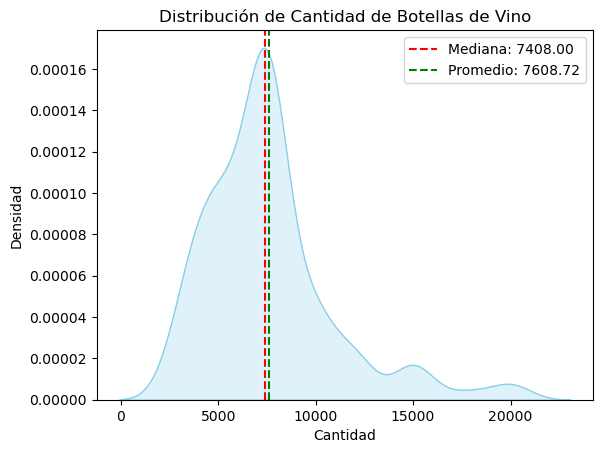

In [15]:
# Crear el gráfico de densidad
sns.kdeplot(df['precio_numerico'], shade=True, color='skyblue')

# Calcular la mediana y el promedio
mediana = df['precio_numerico'].median()
promedio = df['precio_numerico'].mean()

# Agregar líneas verticales para la mediana y el promedio
plt.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(promedio, color='green', linestyle='--', label=f'Promedio: {promedio:.2f}')

# Mostrar leyenda
plt.legend()

# Ajustar título y etiquetas
plt.title('Distribución de Cantidad de Botellas de Vino')
plt.xlabel('Cantidad')
plt.ylabel('Densidad')
plt.show()

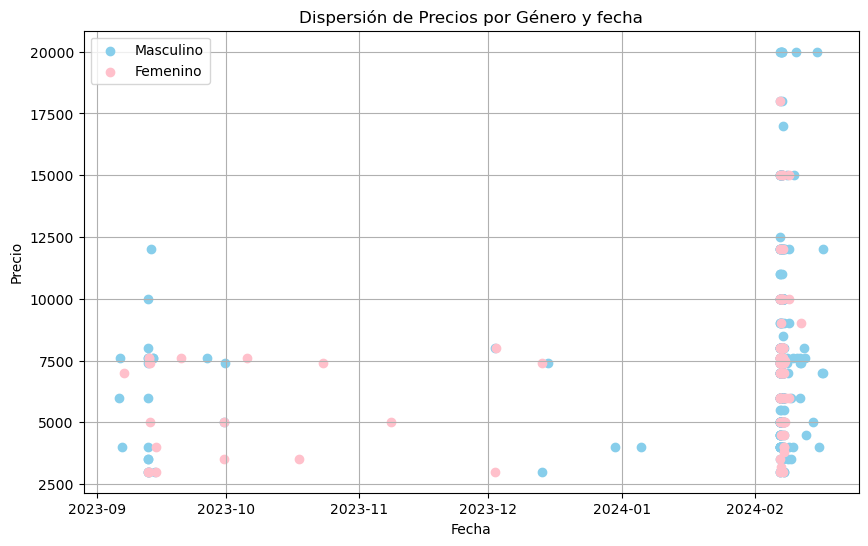

In [16]:
# Crea un gráfico de dispersión de precios separado por género y fecha
plt.figure(figsize=(10, 6))

# Filtrar por género masculino
plt.scatter(df[df['genero'] == 'Masculino'].tiempo, df[df['genero'] == 'Masculino']['precio_numerico'], color='skyblue', label='Masculino')

# Filtrar por género femenino
plt.scatter(df[df['genero'] == 'Femenino'].tiempo, df[df['genero'] == 'Femenino']['precio_numerico'], color='pink', label='Femenino')

plt.title('Dispersión de Precios por Género y fecha')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

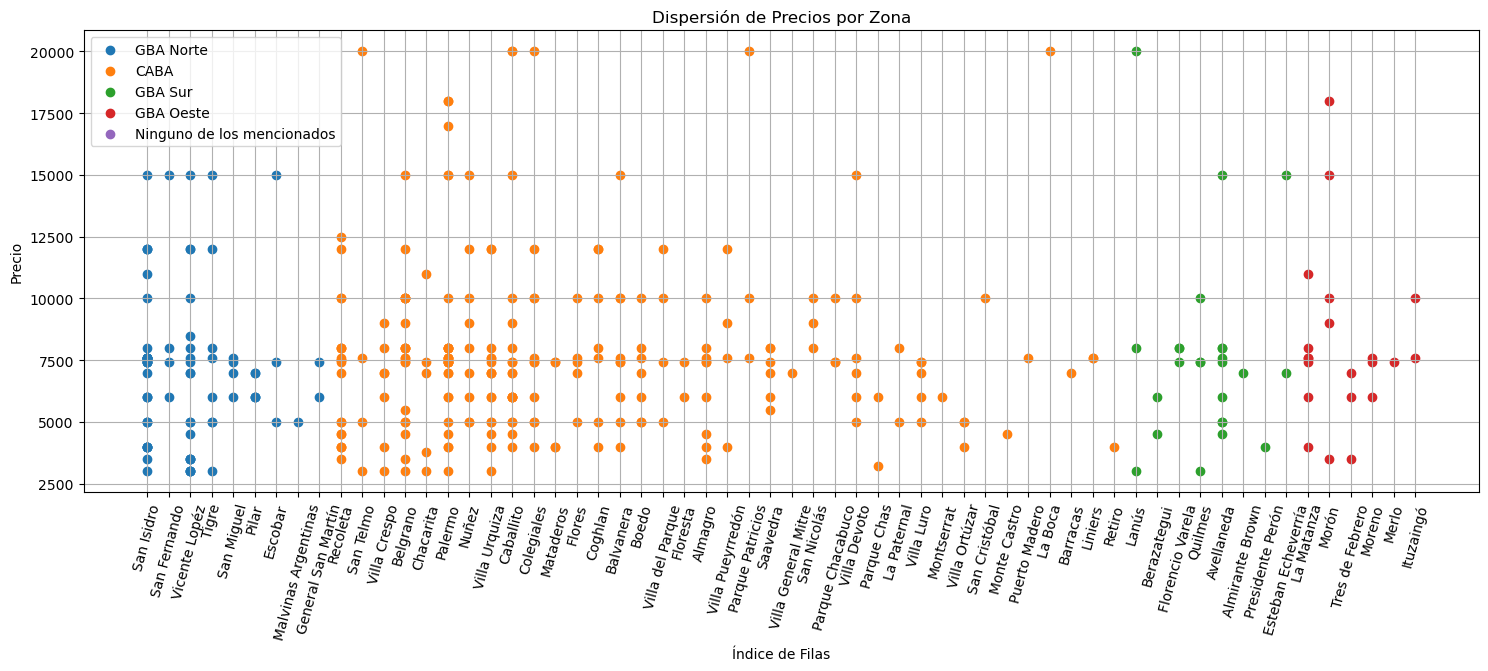

In [17]:
# Obtiene todas las zonas únicas
zonas_unicas = df['zona'].unique()

# Crea un diccionario para mapear zonas a colores automáticamente
colores = plt.cm.tab10.colors  # Utiliza la paleta de colores 'tab10' de Matplotlib

# Crea un gráfico de dispersión de precios separado por zona
plt.figure(figsize=(18, 6))

# Itera sobre cada zona única y grafica sus puntos
for idx, zona in enumerate(zonas_unicas):
    plt.scatter(df[df['zona'] == zona].barrio, df[df['zona'] == zona]['precio_numerico'], color=colores[idx], label=zona)

plt.title('Dispersión de Precios por Zona')
plt.xlabel('Índice de Filas')
plt.ylabel('Precio')
plt.legend()
plt.xticks(rotation=75)  # Rotar los textos del eje x 45 grados
plt.grid(True)
plt.show()

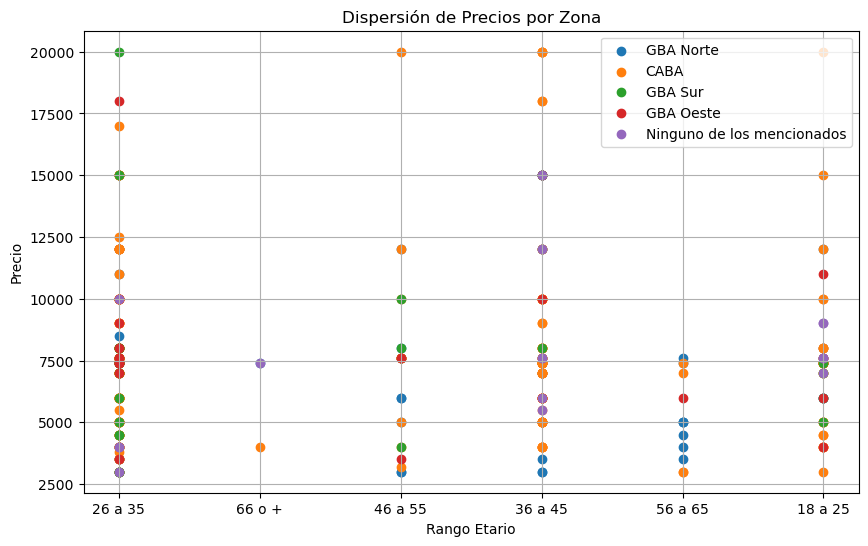

In [18]:
# Obtiene todas las zonas únicas
zonas_unicas = df['zona'].unique()

# Crea un diccionario para mapear zonas a colores automáticamente
colores = plt.cm.tab10.colors  # Utiliza la paleta de colores 'tab10' de Matplotlib

# Crea un gráfico de dispersión de precios separado por zona
plt.figure(figsize=(10, 6))

# Itera sobre cada zona única y grafica sus puntos
for idx, zona in enumerate(zonas_unicas):
    plt.scatter(df[df['zona'] == zona]['rango_etario'], df[df['zona'] == zona]['precio_numerico'], color=colores[idx], label=zona)

plt.title('Dispersión de Precios por Zona')
plt.xlabel('Rango Etario')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

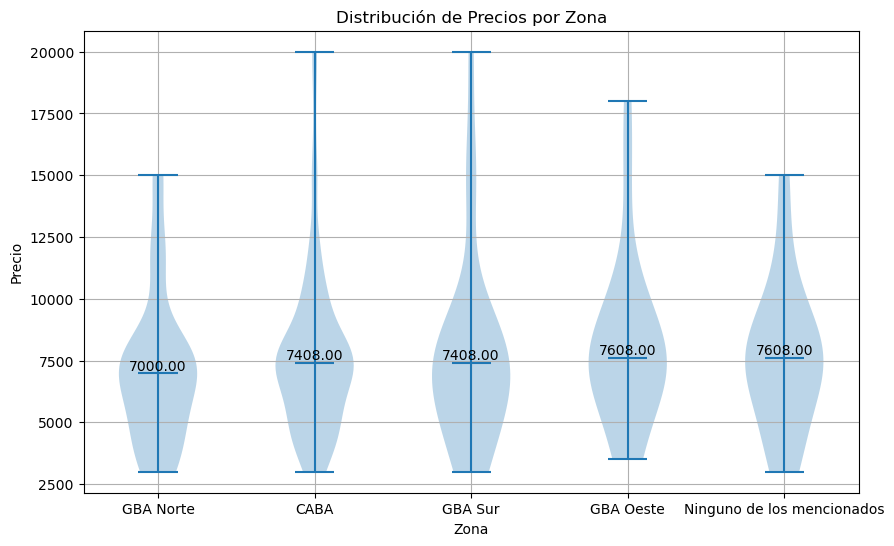

In [19]:
# Crea un gráfico de violín para mostrar la distribución de precios por zona
plt.figure(figsize=(10, 6))
violins = plt.violinplot(dataset=[df[df['zona'] == zona]['precio_numerico'] for zona in df['zona'].unique()],
                         showmeans=False, showmedians=True)

# Agrega los valores de la mediana dentro de cada violín
for i, violin in enumerate(violins['bodies']):
    median = df[df['zona'] == df['zona'].unique()[i]]['precio_numerico'].median()
    plt.text(i + 1, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black')

plt.title('Distribución de Precios por Zona')
plt.xlabel('Zona')
plt.ylabel('Precio')
plt.xticks(ticks=range(1, len(df['zona'].unique()) + 1), labels=df['zona'].unique())
plt.grid(True)

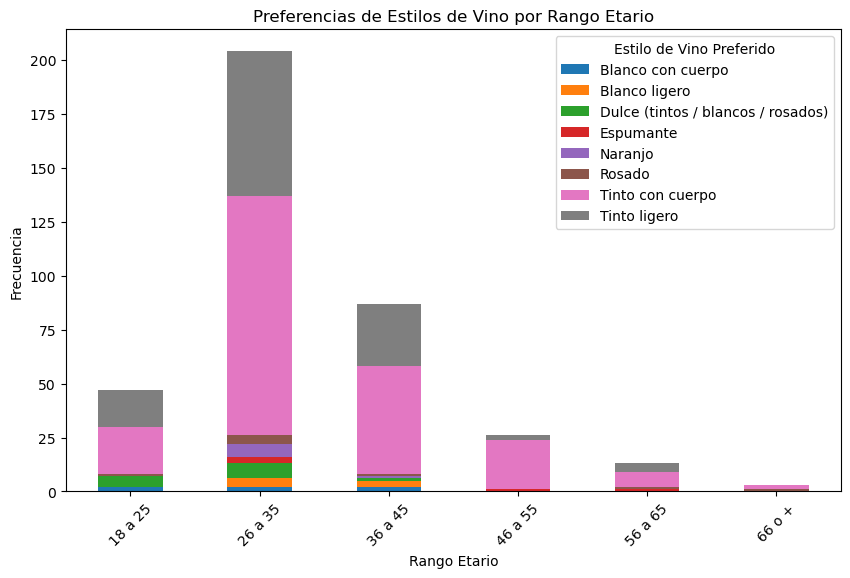

In [20]:
# Crear una tabla de contingencia para Rango Etario y Estilo de Vino Preferido
contingency_table = pd.crosstab(df['rango_etario'], df['preferido'])

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Preferencias de Estilos de Vino por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Estilo de Vino Preferido')
plt.show()

<Figure size 1000x600 with 0 Axes>

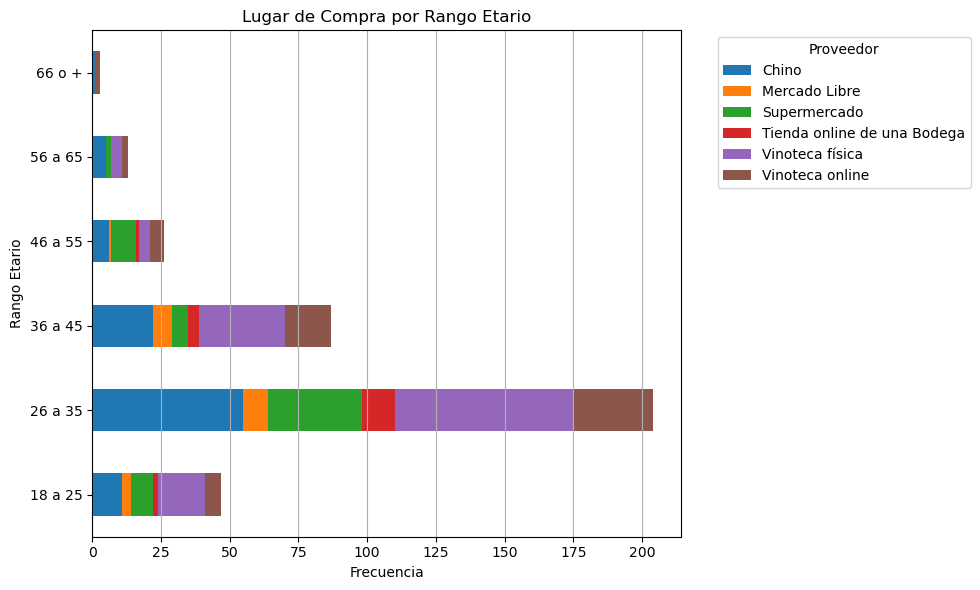

In [21]:

# Crear una tabla de contingencia para Rango Etario y Lugar de Compra
contingency_table = pd.crosstab(df['rango_etario'], df['proveedor'])

# Graficar la tabla de contingencia como un gráfico de barras apiladas horizontal
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas de ejes
plt.title('Lugar de Compra por Rango Etario')
plt.xlabel('Frecuencia')
plt.ylabel('Rango Etario')
plt.legend(title='Proveedor', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.grid(True, axis='x')  # Agrega líneas de la cuadrícula solo en el eje x
plt.tight_layout()  # Ajusta automáticamente el diseño para evitar superposiciones
plt.show()


<Figure size 1000x600 with 0 Axes>

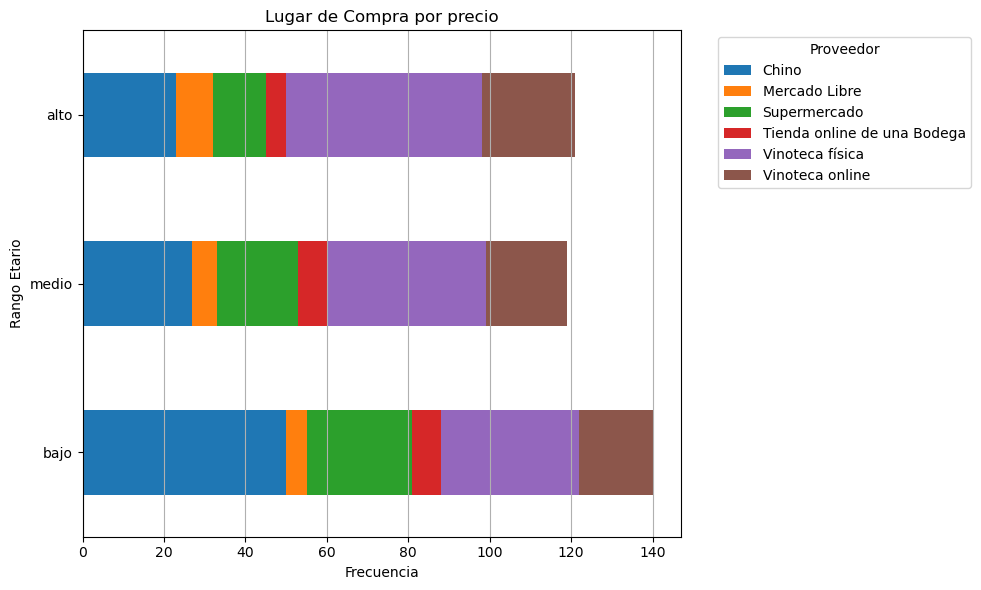

In [22]:
# Calcular los percentiles del precio por tercios
percentiles = df['precio_numerico'].quantile([0.33, 0.66])

# Definir los límites de los intervalos
cut_labels = ['bajo', 'medio', 'alto']
cut_bins = [float('-inf'), percentiles.iloc[0], percentiles.iloc[1], float('inf')]

# Crear la nueva columna categorizando los precios
df['precio_categoria'] = pd.cut(df['precio_numerico'], bins=cut_bins, labels=cut_labels, include_lowest=True)

# Crear una tabla de contingencia para Rango Etario y Lugar de Compra
contingency_table = pd.crosstab(df['precio_categoria'], df['proveedor'])

# Graficar la tabla de contingencia como un gráfico de barras apiladas horizontal
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='barh', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas de ejes
plt.title('Lugar de Compra por precio')
plt.xlabel('Frecuencia')
plt.ylabel('Rango Etario')
plt.legend(title='Proveedor', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico
plt.grid(True, axis='x')  # Agrega líneas de la cuadrícula solo en el eje x
plt.tight_layout()  # Ajusta automáticamente el diseño para evitar superposiciones
plt.show()


Porcentaje de cada tipo de vino:
preferido
Tinto con cuerpo                     56.58
Tinto ligero                         31.32
Dulce (tintos / blancos / rosados)    3.42
Rosado                                2.11
Blanco ligero                         1.84
Naranjo                               1.84
Blanco con cuerpo                     1.58
Espumante                             1.32
Name: count, dtype: float64


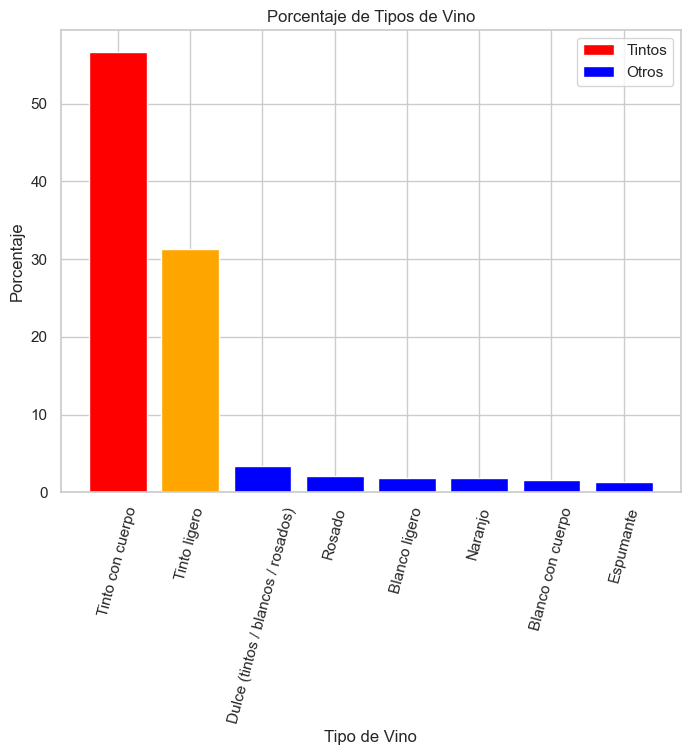

In [38]:
# Contar las ocurrencias de cada tipo de vino
conteo_vinos = df['preferido'].value_counts()

# Calcular el total de observaciones
total_observaciones = len(df)

# Calcular el porcentaje de cada tipo de vino
porcentaje_vinos = conteo_vinos / total_observaciones * 100

# Imprimir los resultados
print("Porcentaje de cada tipo de vino:")
print(porcentaje_vinos)

# Graficar el porcentaje de ambos tipos de vino tintos y el resto por separado
tipos_tintos = ['Tinto con cuerpo', 'Tinto ligero']
otros_vinos = [vino for vino in porcentaje_vinos.index if vino not in tipos_tintos]

# Crear un diccionario para mapear los colores de cada tipo de vino
colores = {'Tinto con cuerpo': 'red', 'Tinto ligero': 'orange'}

# Graficar el porcentaje de ambos tipos de vino tintos y el resto por separado
plt.figure(figsize=(8, 6))
plt.bar(tipos_tintos, porcentaje_vinos[tipos_tintos], color=[colores[tipo] for tipo in tipos_tintos], label='Tintos')
plt.bar(otros_vinos, porcentaje_vinos[otros_vinos], color='blue', label='Otros')
plt.title('Porcentaje de Tipos de Vino')
plt.xlabel('Tipo de Vino')
plt.ylabel('Porcentaje')
plt.xticks(rotation=75)
plt.legend()
plt.show()


In [43]:
# Calcular el porcentaje del total por zona
total_por_zona['porcentaje_total'] = (total_por_zona['total_zona'] / total_general) * 100

# Imprimir la cantidad de compras por zona, barrio y total
print("Cantidad de Compras por Zona y Barrio (ordenado por cantidad_compras):")
print(cantidad_por_zona_barrio)
print("\nTotal por Zona con Porcentaje del Total:")
print(total_por_zona)


Cantidad de Compras por Zona y Barrio (ordenado por cantidad_compras):
         zona               barrio  cantidad_compras
42  GBA Norte           San Isidro                34
18       CABA              Palermo                29
3        CABA             Belgrano                22
45  GBA Norte        Vicente Lopéz                21
23       CABA             Recoleta                20
5        CABA            Caballito                19
35       CABA        Villa Urquiza                16
8        CABA           Colegiales                11
1        CABA            Balvanera                 9
0        CABA              Almagro                 9
53    GBA Sur           Avellaneda                 9
17       CABA                Nuñez                 9
44  GBA Norte                Tigre                 8
7        CABA              Coghlan                 7
47  GBA Oeste           La Matanza                 7
4        CABA                Boedo                 7
29       CABA         Villa 

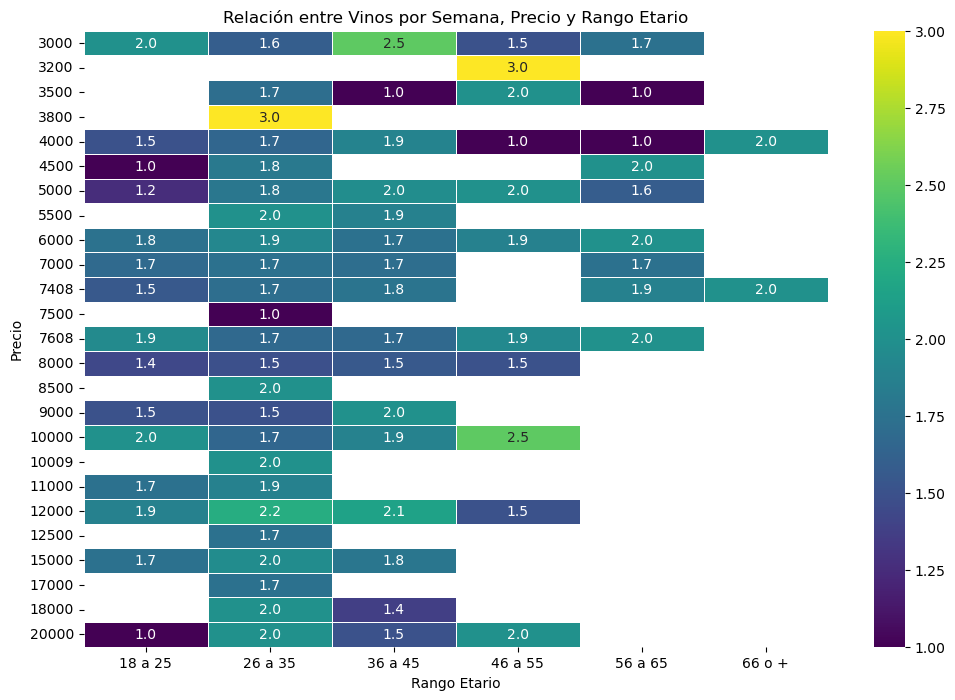

In [24]:
import seaborn as sns
# Crear una tabla pivotante con cantidad de vinos por semana, precio y rango etario
pivot_table = df.pivot_table(index='precio_numerico', columns='rango_etario', values='cantidad_numerico')

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.1f', linewidths=.5)
plt.title('Relación entre Vinos por Semana, Precio y Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Precio')
plt.show()

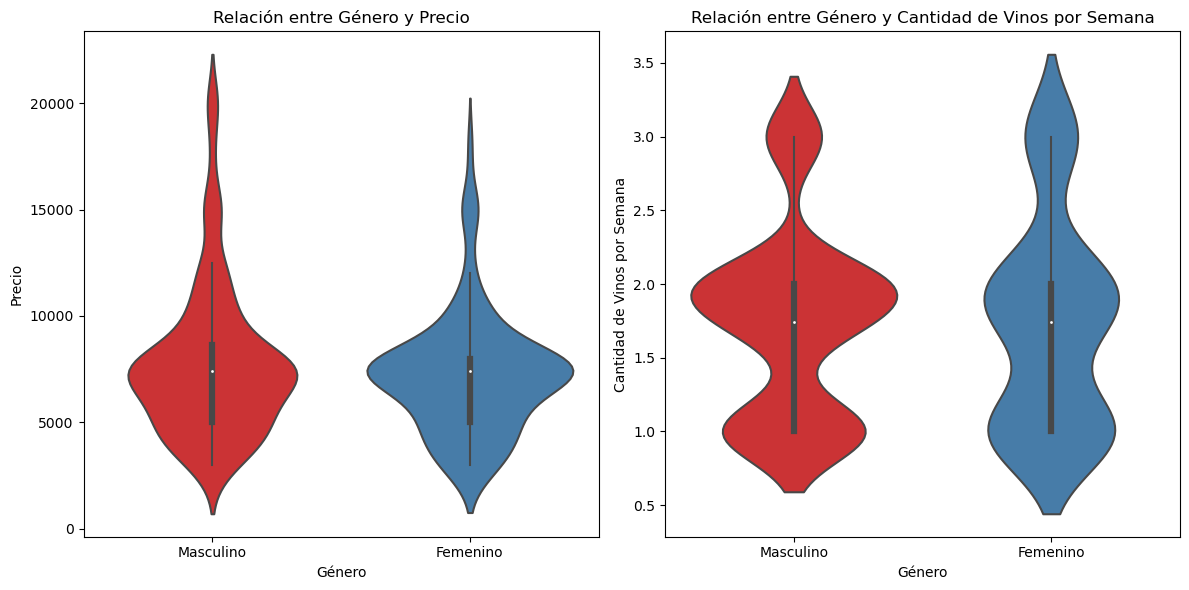

In [25]:
# Graficar la relación entre el género y el precio
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='genero', y='precio_numerico', palette='Set1')
plt.title('Relación entre Género y Precio')
plt.xlabel('Género')
plt.ylabel('Precio')

# Graficar la relación entre el género y la cantidad de vinos por semana
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='genero', y='cantidad_numerico', palette='Set1')
plt.title('Relación entre Género y Cantidad de Vinos por Semana')
plt.xlabel('Género')
plt.ylabel('Cantidad de Vinos por Semana')

plt.tight_layout()
plt.show()

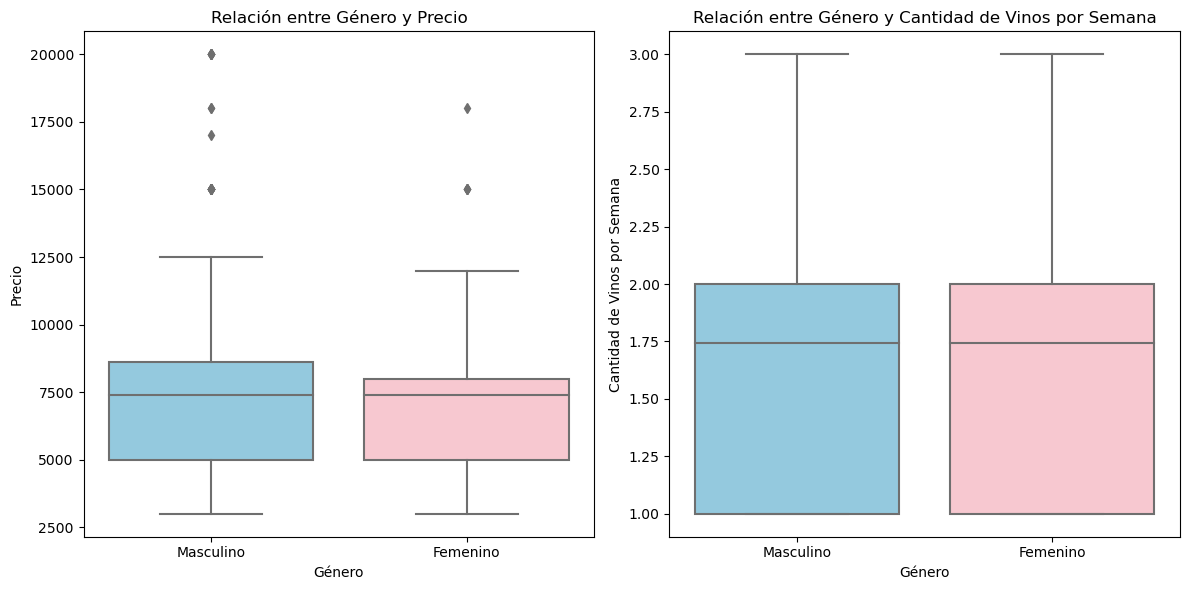

In [26]:
# Graficar la relación entre el género y el precio
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
custom_colors = {"Masculino": "skyblue", "Femenino": "pink"}

sns.boxplot(data=df, x='genero', y='precio_numerico', palette=custom_colors)
plt.title('Relación entre Género y Precio')
plt.xlabel('Género')
plt.ylabel('Precio')

# Graficar la relación entre el género y la cantidad de vinos por semana
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='genero', y='cantidad_numerico', palette=custom_colors)
plt.title('Relación entre Género y Cantidad de Vinos por Semana')
plt.xlabel('Género')
plt.ylabel('Cantidad de Vinos por Semana')

plt.tight_layout()
plt.show()

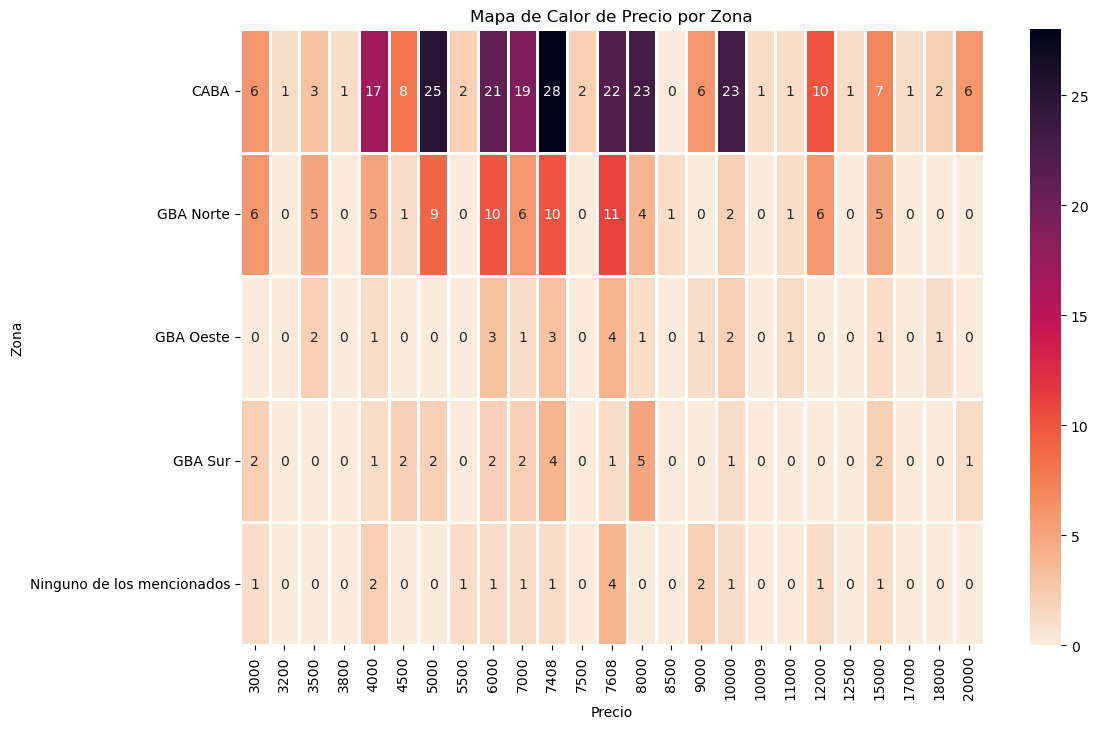

In [27]:
# Crear una tabla pivotante con la zona y el precio
pivot_table = df.pivot_table(index='zona', columns='precio_numerico', aggfunc='size', fill_value=0)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, linewidths=1, linecolor='white', cmap='rocket_r',annot=True, fmt='d') 
plt.title('Mapa de Calor de Precio por Zona')
plt.xlabel('Precio')
plt.ylabel('Zona')
plt.show()

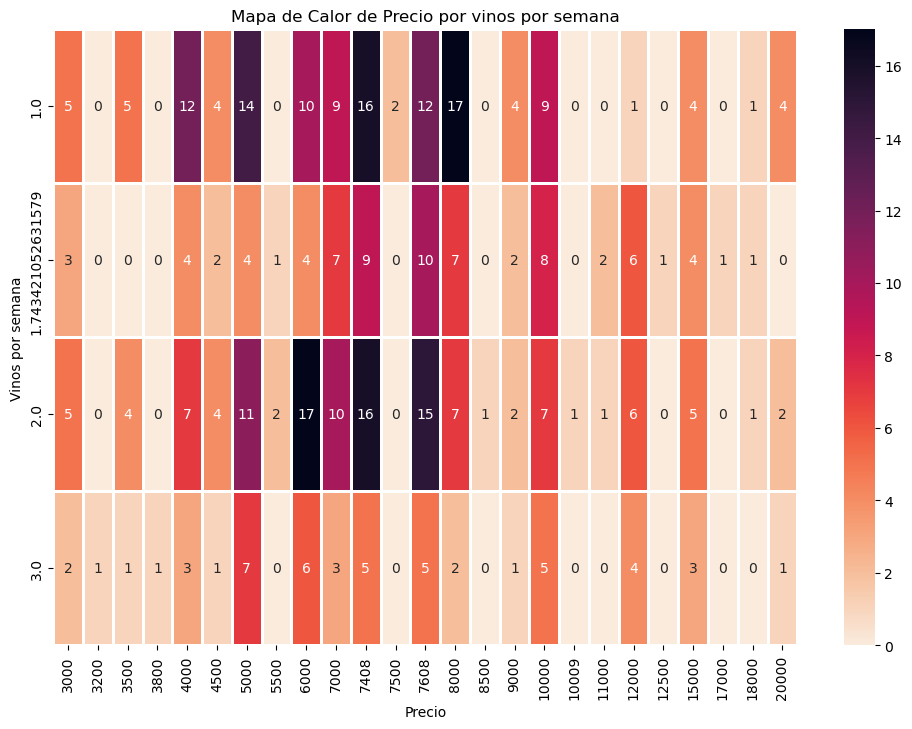

In [28]:
# Crear una tabla pivotante con la zona y el precio
pivot_table = df.pivot_table(index='cantidad_numerico', columns='precio_numerico', aggfunc='size', fill_value=0)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, linewidths=1, linecolor='white', cmap='rocket_r',annot=True, fmt='d') 
plt.title('Mapa de Calor de Precio por vinos por semana')
plt.xlabel('Precio')
plt.ylabel('Vinos por semana')
plt.show()

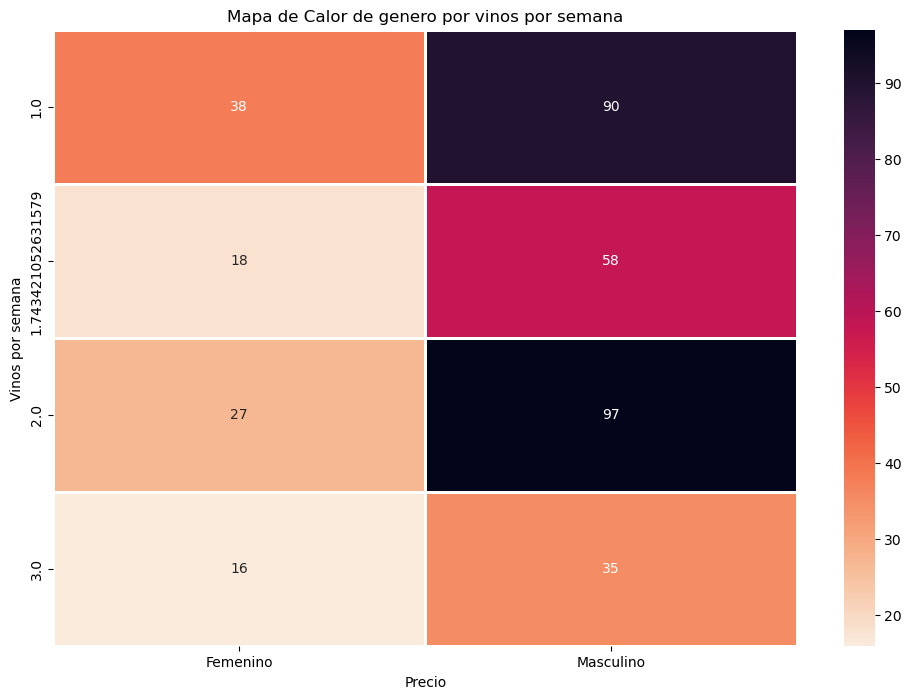

In [29]:
# Crear una tabla pivotante con la zona y el precio
pivot_table = df.pivot_table(index='cantidad_numerico', columns='genero', aggfunc='size', fill_value=0)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, linewidths=1, linecolor='white', cmap='rocket_r',annot=True, fmt='d') 
plt.title('Mapa de Calor de genero por vinos por semana')
plt.xlabel('Precio')
plt.ylabel('Vinos por semana')
plt.show()

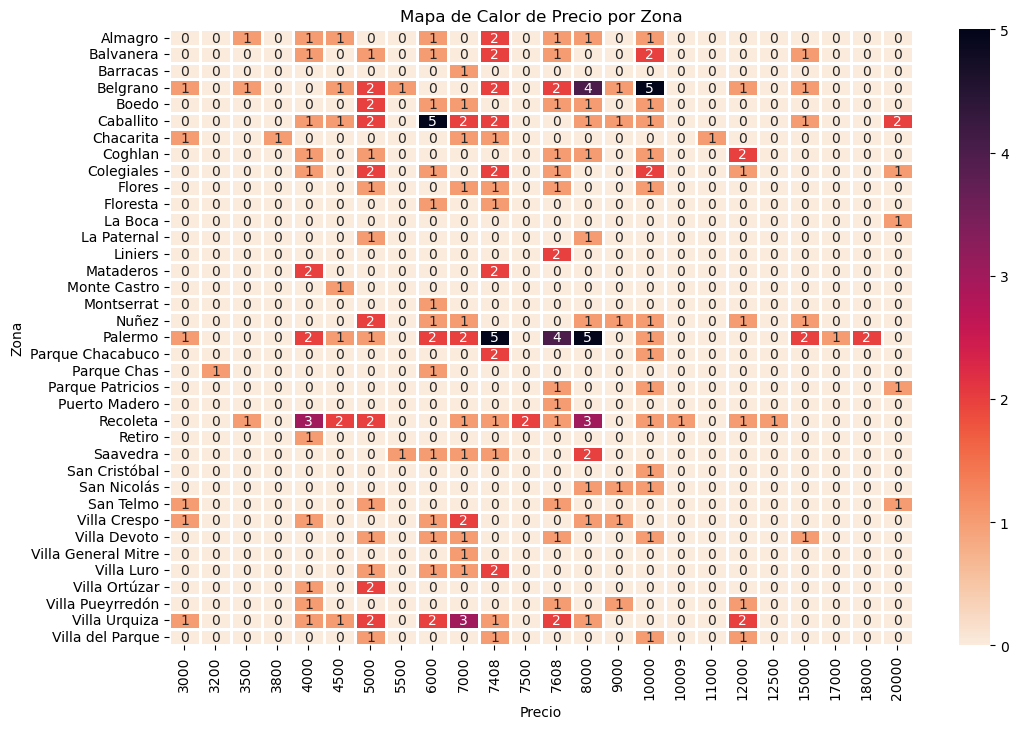

In [30]:
# Crear una tabla pivotante con la zona y el precio
pivot_table = df.loc[df['zona'] == 'CABA'].pivot_table(index='barrio', columns='precio_numerico', aggfunc='size', fill_value=0)

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, linewidths=1, linecolor='white', cmap='rocket_r',annot=True, fmt='d') 
plt.title('Mapa de Calor de Precio por Zona')
plt.xlabel('Precio')
plt.ylabel('Zona')
plt.show()

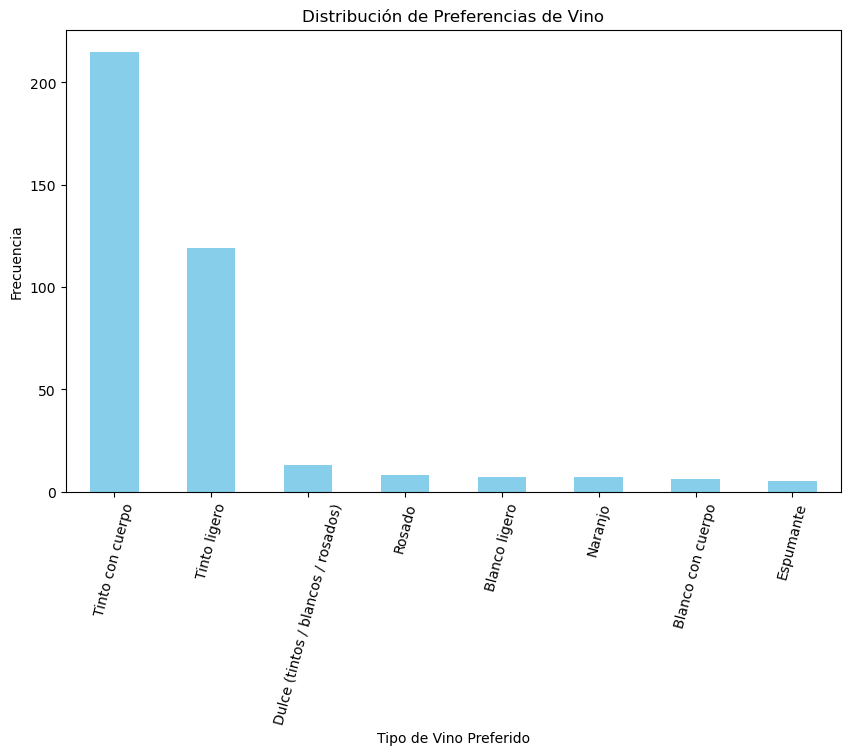

In [31]:
# Visualizar la distribución de las preferencias de vino con un gráfico de barras
plt.figure(figsize=(10, 6))
df['preferido'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Preferencias de Vino')
plt.xlabel('Tipo de Vino Preferido')
plt.ylabel('Frecuencia')
plt.xticks(rotation=75)
plt.show()

In [32]:
# Calcular la frecuencia de cada categoría de 'preferido'
frecuencia_preferido = df['preferido'].value_counts()

# Imprimir la frecuencia de cada categoría
print("Frecuencia de cada categoría de 'preferido':")
print(frecuencia_preferido)

Frecuencia de cada categoría de 'preferido':
preferido
Tinto con cuerpo                      215
Tinto ligero                          119
Dulce (tintos / blancos / rosados)     13
Rosado                                  8
Blanco ligero                           7
Naranjo                                 7
Blanco con cuerpo                       6
Espumante                               5
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

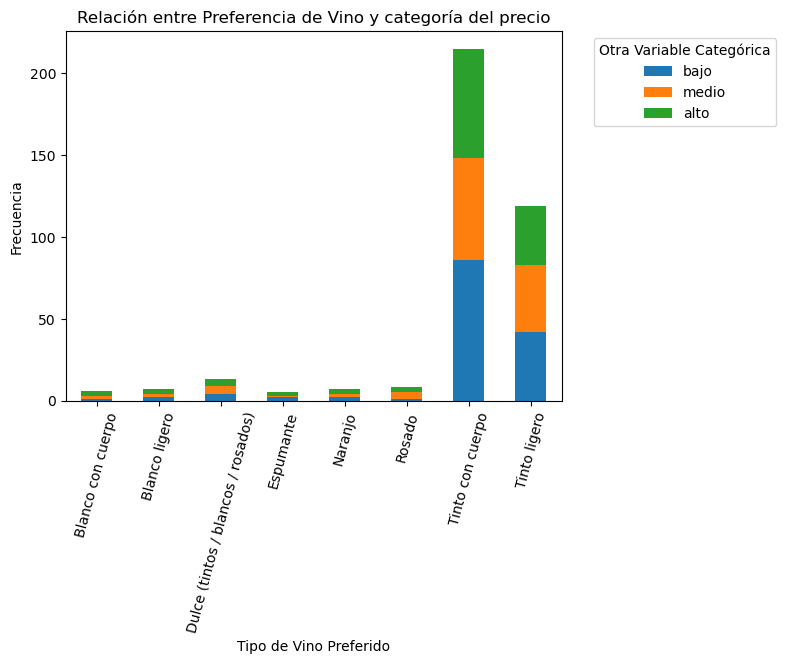

In [33]:
# Calcular la tabla de contingencia entre 'preferido' y otra variable categórica
contingency_table = pd.crosstab(df['preferido'], df['precio_categoria'])

# Graficar la tabla de contingencia como un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Relación entre Preferencia de Vino y categoría del precio')
plt.xlabel('Tipo de Vino Preferido')
plt.ylabel('Frecuencia')
plt.xticks(rotation=75)
plt.legend(title='Otra Variable Categórica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1000x600 with 0 Axes>

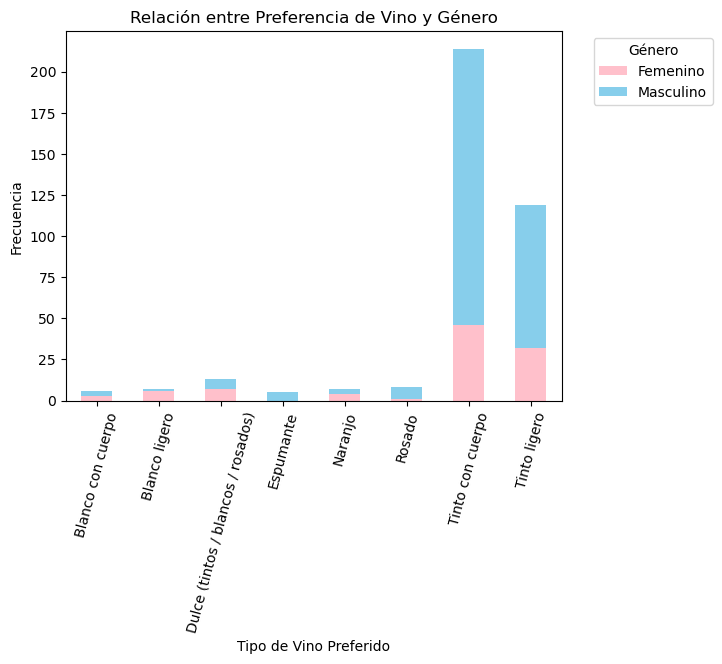

In [34]:
# Calcular la tabla de contingencia entre 'preferido' y 'genero'
contingency_table = pd.crosstab(df['preferido'], df['genero'])
custom_colors = {"Masculino": "skyblue", "Femenino": "pink"}

# Graficar la tabla de contingencia como un gráfico de barras apiladas
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, color=custom_colors)
plt.title('Relación entre Preferencia de Vino y Género')
plt.xlabel('Tipo de Vino Preferido')
plt.ylabel('Frecuencia')
plt.xticks(rotation=75)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')  # Agregar leyenda para el género
plt.show()

### Gustos generales 
Cada participante pudo elegir diferentes opciones sobre que vinos consumía habitualmente y cual era su tipo preferido. El total de las selecciones realizadas fue:

In [35]:
from collections import Counter

# Concatenar todas las cadenas separadas por coma en una sola cadena
todas_categorias = ','.join(df['gustos'])

# Dividir la cadena en elementos individuales y eliminar espacios en blanco alrededor de cada categoría
categorias_separadas = [categoria.strip() for categoria in todas_categorias.split(',')]

# Contar la frecuencia de cada categoría
frecuencia_categorias = Counter(categorias_separadas)

# Imprimir las frecuencias de cada categoría
for categoria, frecuencia in frecuencia_categorias.items():
    print(f'{categoria}: {frecuencia}')

Tinto con cuerpo: 335
Tinto ligero: 319
Rosado: 152
Blanco ligero: 127
Blanco con cuerpo: 112
Naranjo: 112
Dulce (tintos / blancos / rosados): 80
Espumante: 71


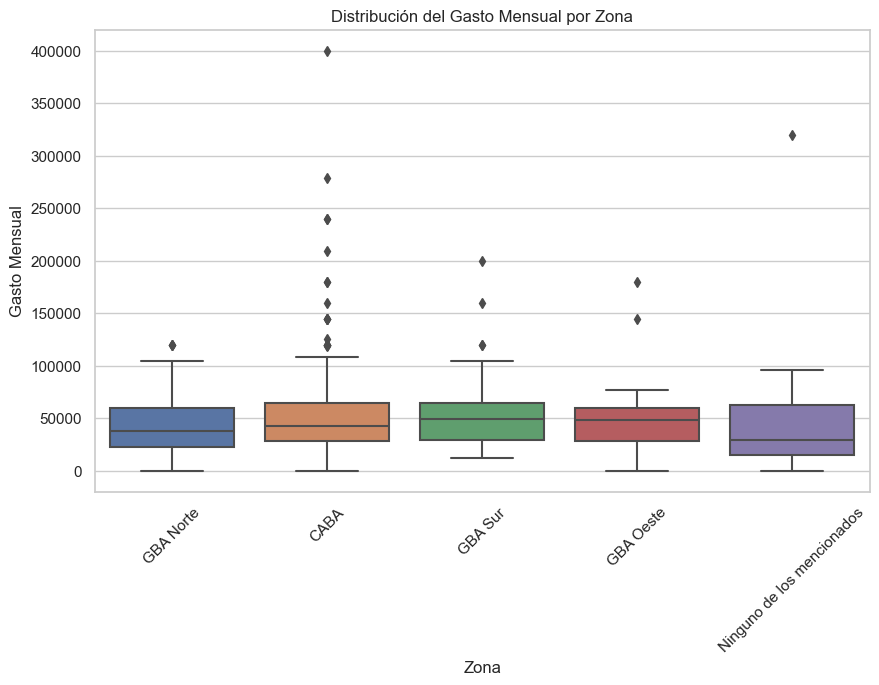

In [36]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de caja para visualizar la distribución del gasto mensual por zona
plt.figure(figsize=(10, 6))
sns.boxplot(x='zona', y='gasto_mensual', data=df)
plt.title('Distribución del Gasto Mensual por Zona')
plt.xlabel('Zona')
plt.ylabel('Gasto Mensual')
plt.xticks(rotation=45)
plt.show()

# Conclusiones:

1. No existen diferencias sustanciales de gustos, comportamientos y/o precio de referencia entre los encuestados hombres y mujeres ya que se encontraron resultados equitativos en relación al precio de referencia, tipos de vino consumidos y lugares de compra.

2. La mediana y el promedio del precio de referencia están en torno a los 7500 pesos, lo que indica que el grupo encuestado es heterogéneo; hay participantes para todas las billeteras ;) 

3. En cuanto a la cantidad de vinos que se abren en una semana, el mínimo es 1 y el máximo fue 3. La mediana se encuentra cercana a 2, siendo que se nota una sutil tendencia a que los hombres abren más vinos por semana que las mujeres.

4. El rango etario de 26 a 35 años es el más participativo, representando casi el 50% de los encuestados, lo que sugiere una mayor concentración de consumidores en este grupo.

5. Respecto del tipo de vino, hay una amplia mayoría de tinto (con cuerpo y ligero) alcanzando el 88%. Los vinos dulces representan un modesto 3.5%, mientras que los rosados, blancos ligeros, blancos con cuerpo, naranjos y espumantes tienen porcentajes aún menores. 

6. En relación a donde se adquieren los vinos, podríamos hablar de una distribución en cuartos si agrupamos las 3 categorías de menor valor en una: 25% en [mercadolibre + supermercado + bodega online], 25% en el Chino, 25% en vinoteca física y 25% en vinoteca online. 

7. En cuanto a las zonas, más del 87 % proviene de CABA y GBA Norte, siendo los barrios más participativos los de San Isidro, Palermo, Belgrano, Vicente López, Recoleta, Caballito y Villa Urquiza.

8. Aquellos que consumen 1, 2 o 3 botellas no tienen variaciones significativas en el precio de referencia. La mayoría se encuentra en un rango entre 5000 y 10000 pesos.

9. Si partimos los precios de referencia en 3 tercios, no existen diferencias sustanciales entre los diferentes tipos de vino, lo que sugiere que el comportamiento o patrón de compra es lineal, sin importar el valor del vino adquirido.